<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Inference/Bv-beta-distribution/bibeta_conv_mmd2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bivariate Beta Model

Notebook for the convergence of the MMD$^2$ approximation

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

Define saving path (adjust if necessary):

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Paper/Inference/'

### Imports

In [ ]:
import numpy as np

### MMD$^2$ convergence

Calculate MMD$^2$ approximation for fixed $d=2$ and varying $n$:

In [ ]:
np.random.seed(11)

Set parameters:

In [ ]:
n = [ 2**j for j in range(3,15) ]       # number of simulated samples - powers of 2
m = 2**15                               # number of true samples
num = 25                                # numbers of repetitions for MC and RQMC
theta = (1.5,1.5,1.5,1.5,1.5)                     # true theta
d = 2                                    # data dimensions
kernel = 'gaussian'                     # 'gaussian' or 'imq' or 'matern'
l = 1.5*d**(1/2)                        # lengthscale for Gaussian kernel (l=-1 for median heuristic)
c = 1                                   # parameter c for IMQ kernel
b = -0.5                                # parameter beta for IMQ kernel
nu = 7/2                                # parameter nu for Matern kernel
stat_type = 'v'                         # 'v' for V-statistic, 'u' for U-statistic

Define QMC sequence:

In [ ]:
i_theta,_ = divmod(theta,np.ones(5)) 
i_theta.astype(int)
qmc = qmcpy.Halton(np.sum(i_theta.astype(int)),seed=7)

Calculate MMD$^2$ approximation for varying $n$:

In [ ]:
mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc = mmd_conv('bibeta',n,num,2,l,c,b,nu,kernel,stat_type,theta)

sample size:  8
sample size:  16
sample size:  32
sample size:  64
sample size:  128
sample size:  256
sample size:  512
sample size:  1024
sample size:  2048
sample size:  4096
sample size:  8192
sample size:  16384


Plot the MMD$^2$ approximation against $n$:

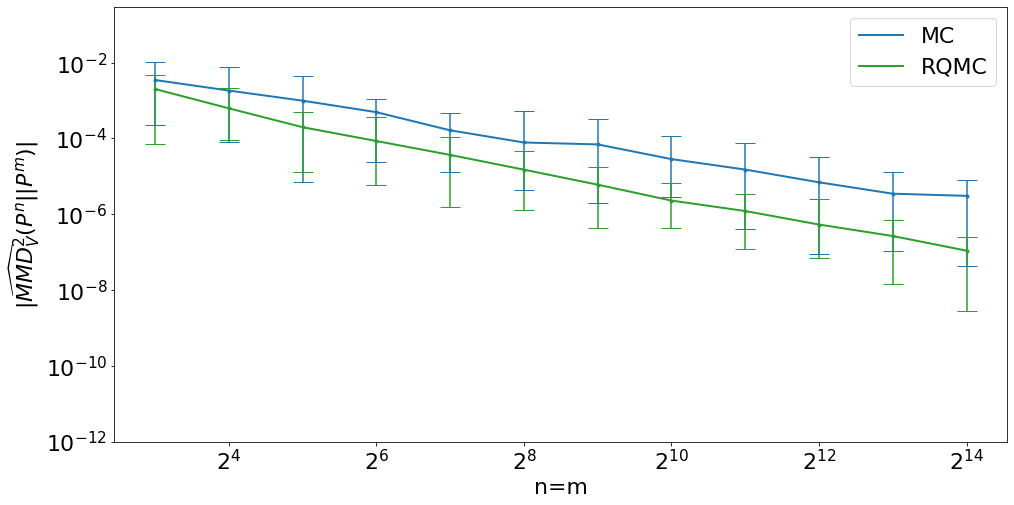

In [ ]:
plot_mmd_conv(2,(16,8),mmd_mc,mmd_qmc,mmd_rqmc,'MC','QMC','RQMC',mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,'bibeta',stat_type)

In [ ]:
#np.savez(path+"bibeta_mmd2_n_%sstat_k%s_int.npz" %(stat_type,kernel), mmd_mc=mmd_mc,mmd_min_mc=mmd_min_mc,mmd_max_mc=mmd_max_mc,mmd_rqmc=mmd_rqmc,mmd_min_rqmc=mmd_min_rqmc,mmd_max_rqmc=mmd_max_rqmc,mmd_qmc=mmd_qmc)
np.savez(path+"bibeta_mmd2_n_%sstat_k%s_noint.npz" %(stat_type,kernel), mmd_mc=mmd_mc,mmd_min_mc=mmd_min_mc,mmd_max_mc=mmd_max_mc,mmd_rqmc=mmd_rqmc,mmd_min_rqmc=mmd_min_rqmc,mmd_max_rqmc=mmd_max_rqmc,mmd_qmc=mmd_qmc)